




### Importing the LIbraries

In [2]:
import matplotlib.pyplot as plt


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline

### Importing the datasets

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
# Joining the train and test datas


train['data'] = 'train'      
test['data'] = 'test'
test['Item_Outlet_Sales'] = np.nan
df = pd.concat([train,test],0,sort= False)

In [6]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'data'],
      dtype='object')

In [7]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'data', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
# Joined datasets shape

df.shape

(14204, 13)

In [9]:
# Shape of data

print(train.shape)
print(test.shape)

(8523, 13)
(5681, 13)


In [10]:
# Seeing the top 5 rows of the dataset

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,data
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [11]:
# Checking for null , dtypes, 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
Item_Identifier              14204 non-null object
Item_Weight                  11765 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  10188 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
Item_Outlet_Sales            8523 non-null float64
data                         14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.5+ MB


In [12]:
# Number of categories in object type columns

for i in df.select_dtypes(include = 'object'):
    print(df[i].value_counts())

FDW47    10
FDZ48    10
NCH55    10
FDI41    10
DRF01    10
FDW39    10
FDQ04    10
FDD45    10
NCQ43    10
FDB17    10
FDW40    10
NCC31    10
FDC20    10
DRG49    10
FDK38    10
FDI15    10
FDB23    10
FDX40    10
DRG48    10
FDD02    10
DRH39    10
FDE21    10
FDA38    10
FDE09    10
NCK29    10
FDR33    10
FDC57    10
NCZ42    10
FDH04    10
FDR31    10
         ..
FDE14     8
FDG29     8
FDO04     8
NCD18     8
FDU19     8
DRC12     8
FDQ01     8
FDI02     8
NCU06     8
DRI59     8
FDY25     8
FDU56     8
NCM41     8
FDT35     8
FDU59     8
NCB42     8
NCT17     8
FDS22     7
FDH58     7
FDM10     7
FDM50     7
FDR51     7
FDO33     7
NCW54     7
FDI46     7
FDX49     7
FDL50     7
FDM52     7
DRN11     7
NCL42     7
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Food

In [13]:
# Number of unique variable in each columns  

for i,j in enumerate(df.columns):
    print(df.columns[i],len(df[j].unique()))

Item_Identifier 1559
Item_Weight 416
Item_Fat_Content 5
Item_Visibility 13006
Item_Type 16
Item_MRP 8052
Outlet_Identifier 10
Outlet_Establishment_Year 9
Outlet_Size 4
Outlet_Location_Type 3
Outlet_Type 4
Item_Outlet_Sales 3494
data 2


In [14]:
# checking if there are any 0 values  in the columns

for i in (df.columns):
    print(i,df[df[i] == 0][i].count())

Item_Identifier 0
Item_Weight 0
Item_Fat_Content 0
Item_Visibility 879
Item_Type 0
Item_MRP 0
Outlet_Identifier 0
Outlet_Establishment_Year 0
Outlet_Size 0
Outlet_Location_Type 0
Outlet_Type 0
Item_Outlet_Sales 0
data 0


In [15]:
# Value counts of the target variable

df['Outlet_Location_Type'].value_counts().sort_index()

Tier 1    3980
Tier 2    4641
Tier 3    5583
Name: Outlet_Location_Type, dtype: int64

In [16]:
# group by to find the item weight according to the itemidentifiers 

item_weight_identifier = df.groupby('Item_Identifier').Item_Weight.mean()

In [17]:
# Imputing the missing values in item weight

df['Item_Weight'] = df.groupby('Item_Identifier').transform(lambda x: x.fillna(x.mean()))

In [18]:
# checking for null values 
df['Item_Weight'].isnull().sum()

0

In [19]:
# Groupby

df.groupby('Item_Type').Item_MRP.mean()

Item_Type
Baking Goods             127.458237
Breads                   141.389849
Breakfast                137.985444
Canned                   138.620936
Dairy                    147.230998
Frozen Foods             136.467385
Fruits and Vegetables    144.304237
Hard Drinks              137.295031
Health and Hygiene       133.108079
Household                148.736501
Meat                     140.291141
Others                   133.745047
Seafood                  141.288751
Snack Foods              146.460309
Soft Drinks              135.403726
Starchy Foods            149.751917
Name: Item_MRP, dtype: float64

In [20]:

df['Item_Weight'] = df['Item_Weight']

In [21]:
# checking for null values in the dataset
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
data                            0
dtype: int64

In [22]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [23]:
# cleaning the fat content column
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg','Regular')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat','Low Fat')

In [24]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [25]:
df['Item_Fat_Content'].isnull().sum()

0

In [26]:
df.drop(['Item_Identifier','Outlet_Identifier',],1,inplace = True)

In [27]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales', 'data'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 11 columns):
Item_Weight                  14204 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  10188 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
Item_Outlet_Sales            8523 non-null float64
data                         14204 non-null object
dtypes: float64(4), int64(1), object(6)
memory usage: 1.3+ MB


In [29]:
# value counts for the object type columns

for i in df.select_dtypes(include = 'object'):
    print(df[i].value_counts())

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64
train    8523
test     5681
Name: data, dtype: int64


In [30]:
col = df.select_dtypes(include = 'object').columns[:-1]

In [31]:
col

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [32]:
# getting dummies fot categorical columns

df_dummy = pd.get_dummies(df[col],drop_first = True)

In [33]:
df.drop(col,axis = 1,inplace = True)

In [34]:
# creating the final dataframe 

final = pd.concat([df,df_dummy],1)

In [35]:
final.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,data,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,train,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,train,1,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,train,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,train,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,train,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [36]:
final.shape

(14204, 29)

In [37]:
# splitting again ton train test
train = final[final['data'] == 'train']
test_df = final[final['data'] == 'test']

In [38]:
train.drop('data',1,inplace = True)


C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [39]:
test_df.drop('data',1,inplace = True)

### Splitting the data

In [40]:
X = train.drop('Item_Outlet_Sales',1)
y = train.Item_Outlet_Sales

In [41]:
X_train,X_validation,y_train,y_validation = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [42]:
print(X_train.shape)
print(X_validation.shape)
print(y_train.shape)
print(y_validation.shape)

(5966, 27)
(2557, 27)
(5966,)
(2557,)


In [43]:
X.shape

(8523, 27)

In [44]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
print(lr.score(X_train,y_train))
print(lr.score(X_validation,y_validation))

0.5630244570829994
0.5617658304253599


### Feature Engineering

In [46]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     405.7
Date:                Mon, 30 Sep 2019   Prob (F-statistic):               0.00
Time:                        21:55:56   Log-Likelihood:                -71993.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8495   BIC:                         1.442e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -6096.1385   7050.175     -0.865      0.387   -1.99e+04    7723.921
Item_Weight                         0.1845      2.657      0.069      0.945      -5.024       5.393
Item_Visibility                  -295.3881    248.845     -1.187      0.235    -783.184     192.408
Item_MRP                           15.5605      0.198     78.669      0.000      15.173      15.948
Outlet_Establishment_Year           2.0778      3.537      0.587      0.557      -4.856       9.011
Item_Fat_Content_Regular           40.9256     28.248      1.449      0.147     -14.447      96.298
Item_Type_Breads                    1.6818     84.097      0.020      0.984    -163.170     166.533
Item_Type_Breakfast                 9.0748    116.671      0.078      0.938    -219.630     237.779
Item_Type_Canned                   24.5227     62.803      0.390      0.696     -98.586     147.632
Item_Type_Dairy                   -40.7129     62.268     -0.654      0.513    -162.774      81.348
Item_Type_Frozen Foods            -26.7447     58.896     -0.454      0.650    -142.196      88.707
Item_Type_Fruits and Vegetables    27.9917     54.999      0.509      0.611     -79.820     135.804
Item_Type_Hard Drinks              -3.0981     90.232     -0.034      0.973    -179.975     173.778
Item_Type_Health and Hygiene      -10.4802     68.048     -0.154      0.878    -143.871     122.910
Item_Type_Household               -40.8479     59.981     -0.681      0.496    -158.425      76.729
Item_Type_Meat                     -0.1084     70.688     -0.002      0.999    -138.675     138.458
Item_Type_Others                  -23.9056     98.701     -0.242      0.809    -217.383     169.572
Item_Type_Seafood                 179.9858    148.084      1.215      0.224    -110.294     470.266
Item_Type_Snack Foods             -12.2304     55.288     -0.221      0.825    -120.609      96.148
Item_Type_Soft Drinks             -27.2251     70.209     -0.388      0.698    -164.853     110.402
Item_Type_Starchy Foods            20.8202    103.119      0.202      0.840    -181.317     222.958
Outlet_Size_Medium                202.6349     70.478      2.875      0.004      64.480     340.790
Outlet_Size_Small                 127.8405     45.433      2.814      0.005      38.780     216.901
Outlet_Location_Type_Tier 2       111.3529     63.816      1.745      0.081     -13.742     236.448
Outlet_Location_Type_Tier 3       143.7123     62.042      2.316      0.021      22.095     265.330
Outlet_Type_Supermarket Type1    1912.7753     44.618     42.870      0.000    1825.313    2000.238
Outlet_Type_Supermarket Type2    1373.7536    101.847     13.488      0.000    1174.108    1573.399
Outlet_Type_Supermarket Type3    3150.5492    100.938     31.213      0.000    2952

##### Assumptions 1 no autocorrelation

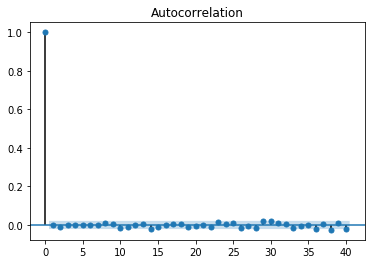

In [47]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid, lags=40 , alpha=0.05)
acf.show()

### ASSUMPTION 2

In [48]:
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

(2319.2085109438112, 0.0)


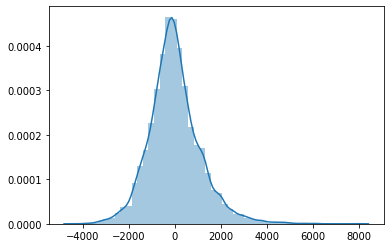

In [49]:
import seaborn as sns

sns.distplot(lin_reg.resid)

### ASSUMPTION 3 - LINEARITY OF RESIDUALS

In [1]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y)  

KeyboardInterrupt: 

##### RAINBOW TEST

In [51]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.4)

(1.0565139964741916, 0.04021941087834811)

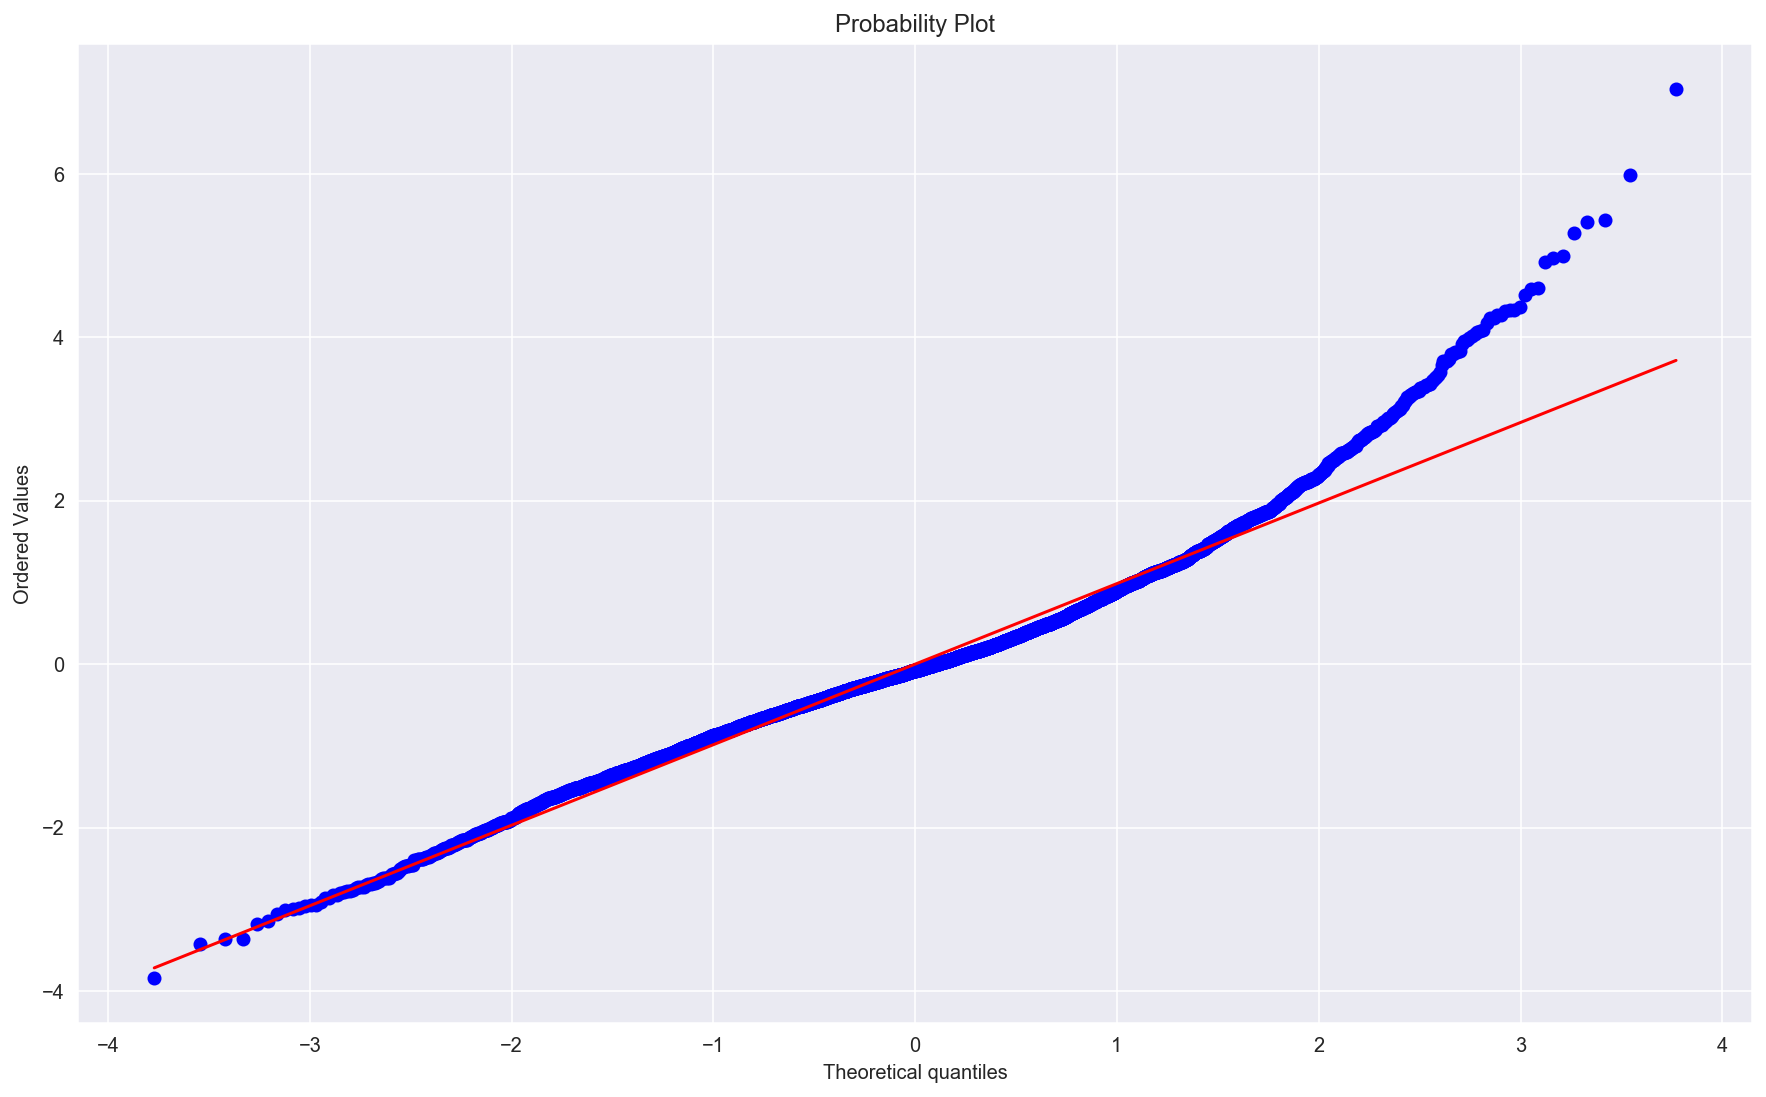

In [52]:
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot
st_residual = lin_reg.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

In [53]:
lin_reg.resid.mean()

-4.9760860925156295e-11

#### ASSUMPTION 4 - HOMOSCEDASTICITY TEST

##### GOLDFELD TEST

[('F statistic', 0.9942804184502442), ('p-value', 0.5740109382611122)]

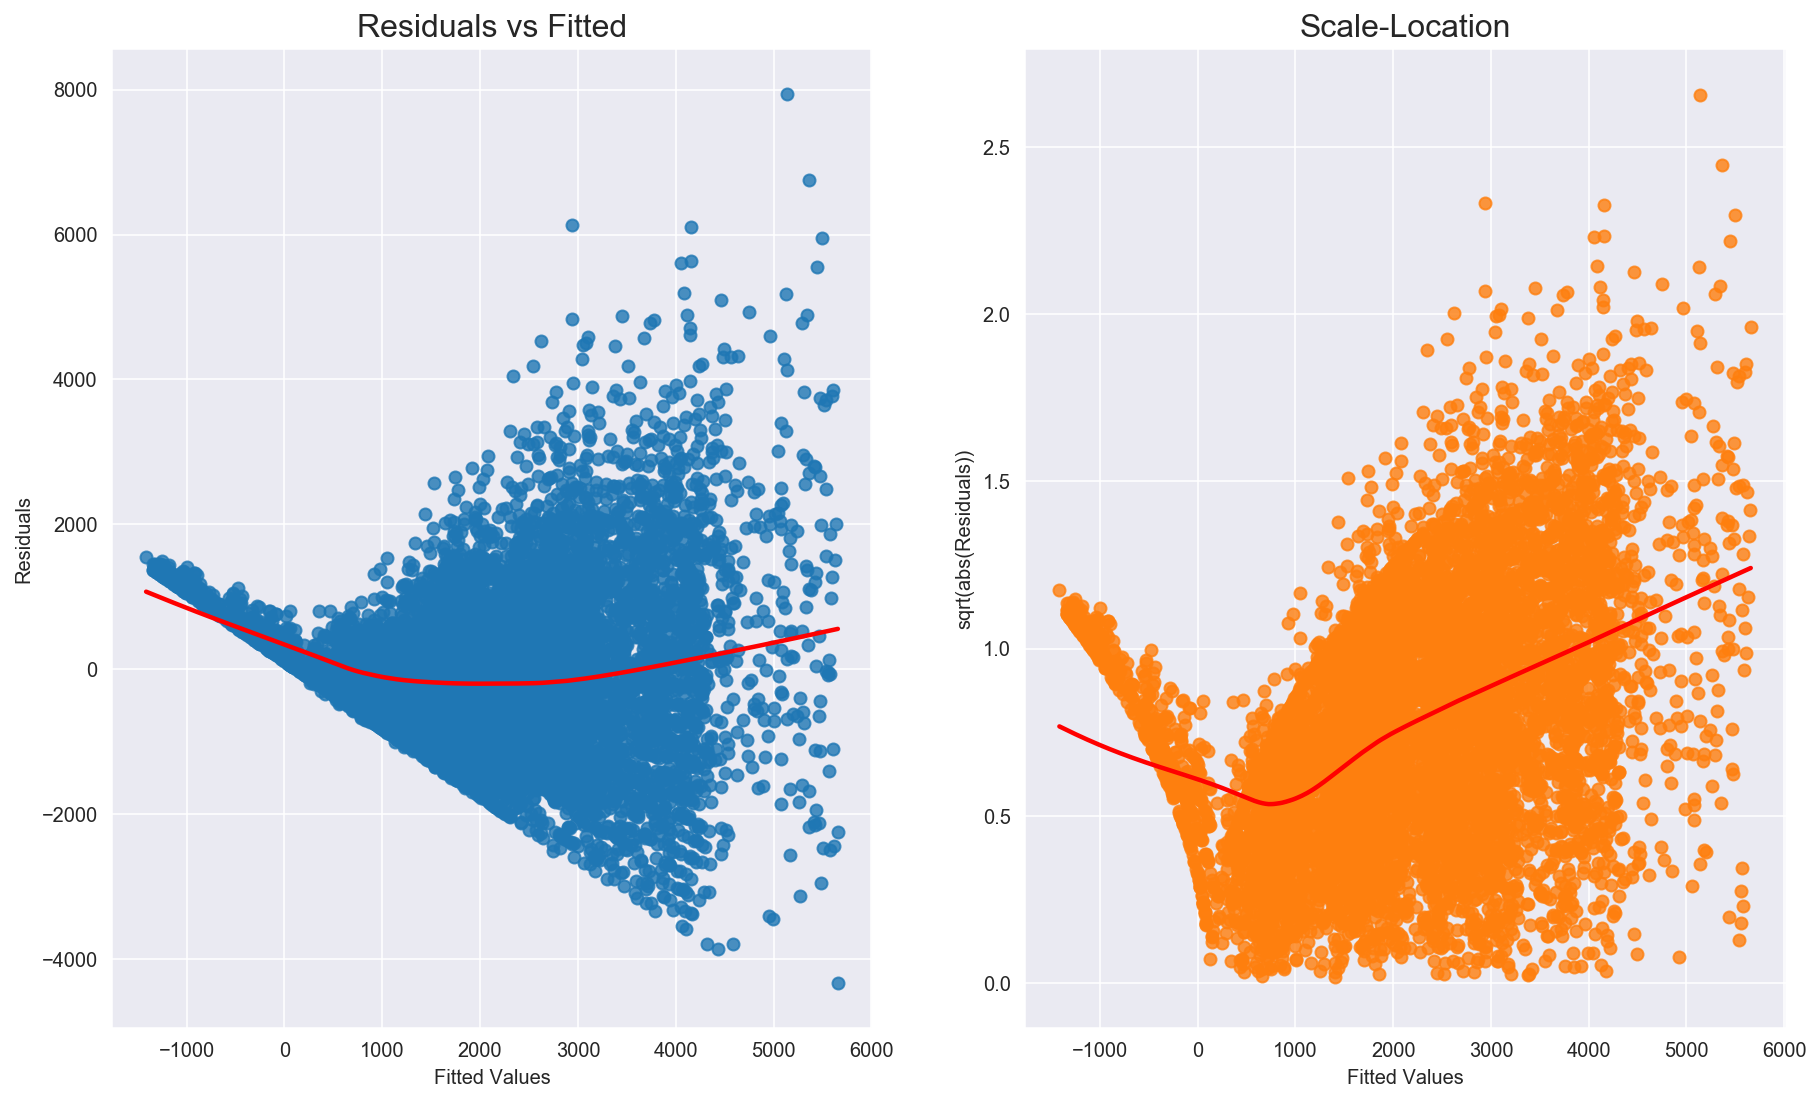

In [54]:
from statsmodels.compat import lzip
import numpy as np
from statsmodels.compat import lzip
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

model = lin_reg
fitted_vals = model.predict()
resids = model.resid
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2)

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')
sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

######  ASSUMPTION 5 - NO MULTI COLLINEARITY

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns)

,vif
Item_Weight,1.017728
Item_Visibility,1.101000
Item_MRP,1.013283
Outlet_Establishment_Year,5.855972
Item_Fat_Content_Regular,1.216711
Item_Type_Breads,1.350153
Item_Type_Breakfast,1.158261
Item_Type_Canned,1.853242
Item_Type_Dairy,1.906452
Item_Type_Frozen Foods,2.093203


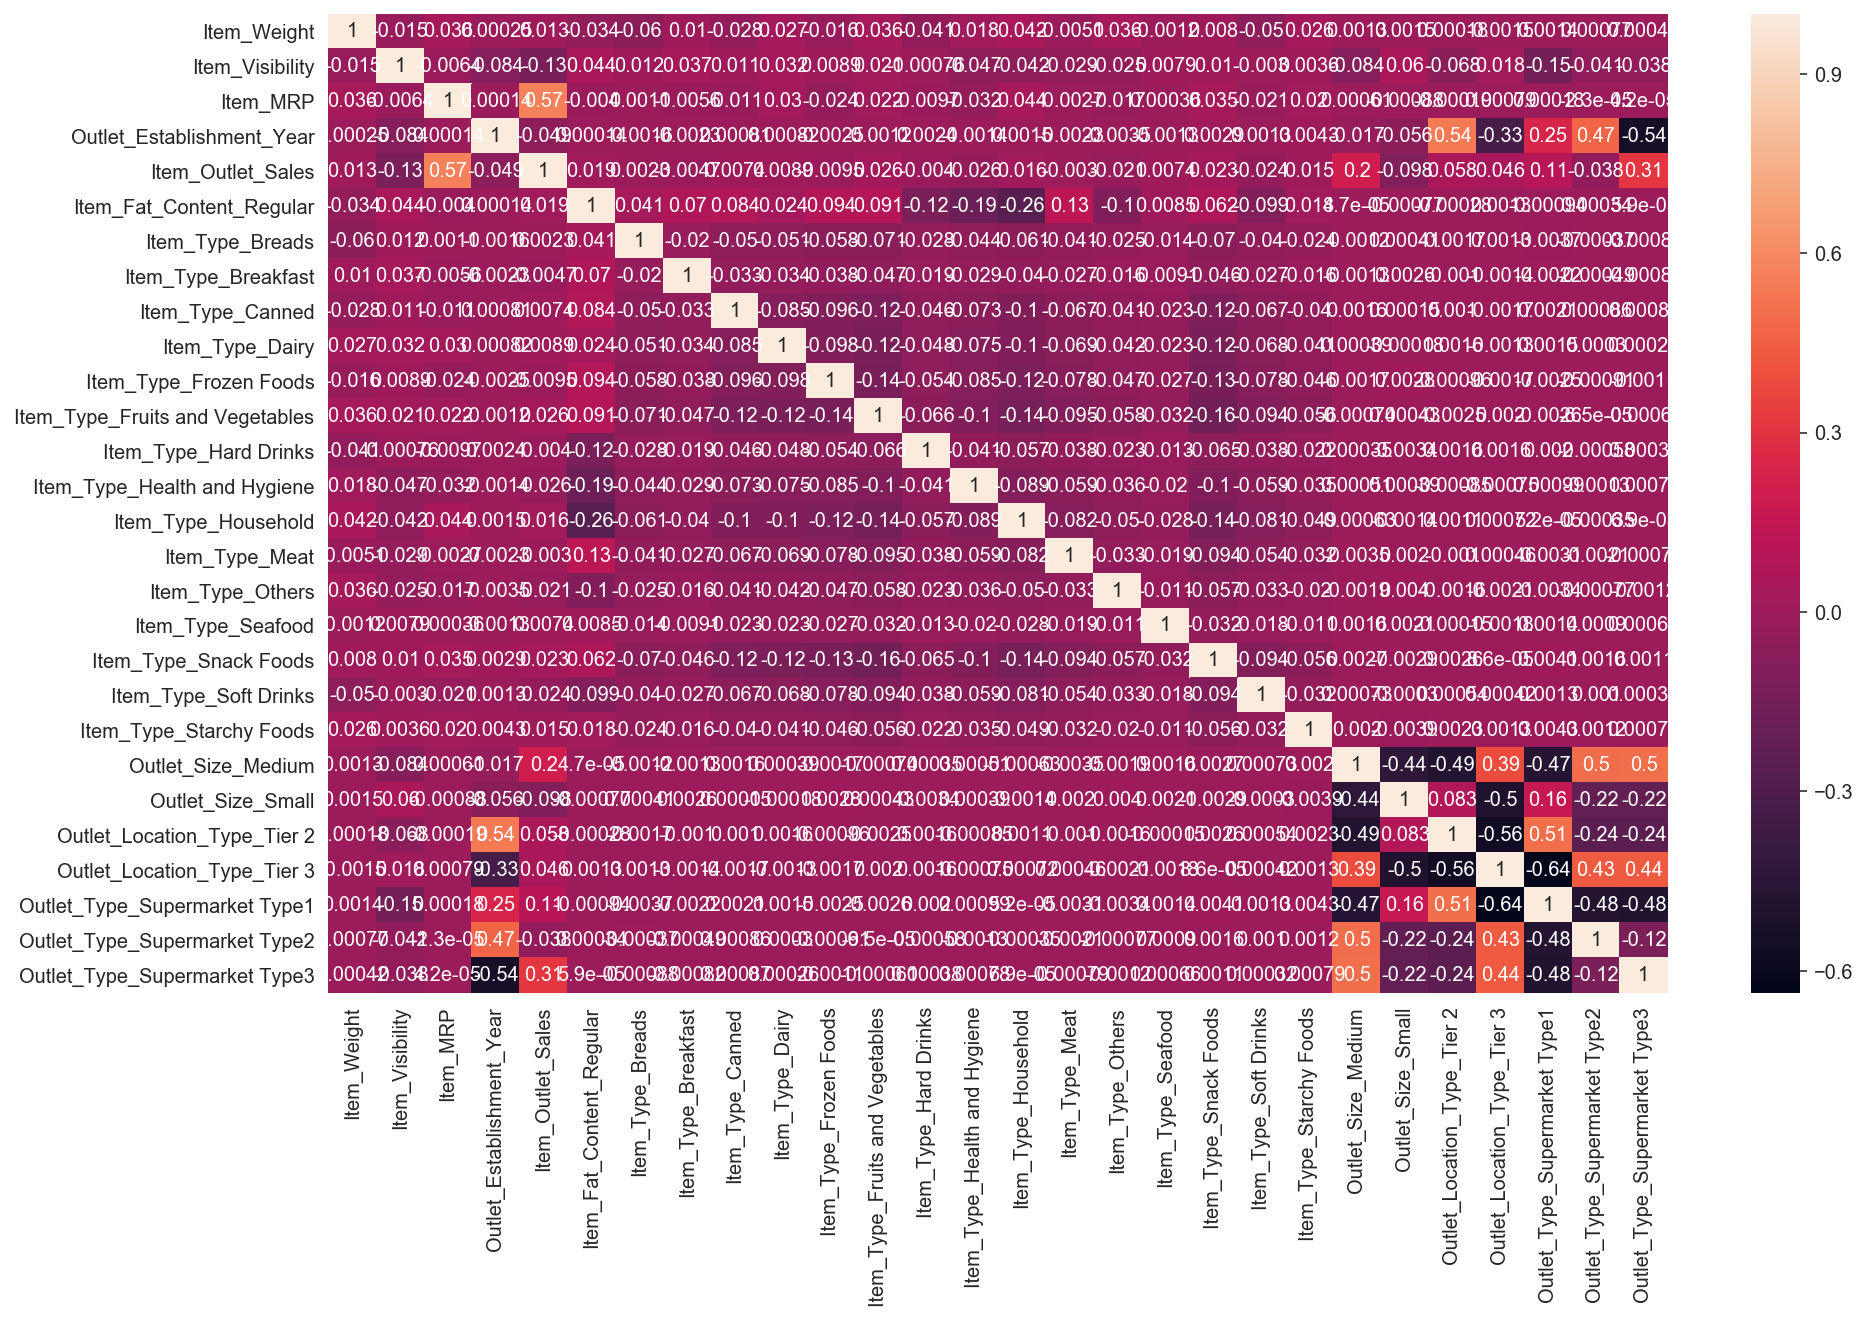

In [56]:
sns.heatmap(final.corr(), annot=True)

##### Function to build statsmodel and ML models

In [57]:
def statsmodel(x,y):
    x_constant = sm.add_constant(x)
    reg_model = sm.OLS(y,x_constant).fit()
    return reg_model.summary()

def ML_model(lr,x,y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)
    lr.fit(X_train,y_train)
    print('Train score -',lr.score(X_train,y_train))
    print('test score - ',lr.score(X_test,y_test))

### FEATURE SELECTION

##### vif method

In [58]:
# removing collinear variables
# function definition

def calculate_vif(x):
    thresh = 5.0
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

In [59]:
## passing X to the function so that the multicollinearity gets removed.
train_out = calculate_vif(X)

Iteration no.
1
[8.832515444385953, 2.908781013947631, 6.2078113534399035, 54.00941344311128, 1.8795034201219332, 1.3910527559446633, 1.1733478306270722, 2.005929874052963, 2.072145449344238, 2.3268212373337396, 2.9202103606009144, 1.3653922955151403, 1.8869510021078157, 2.565590673528017, 1.66422528322665, 1.2900543312756583, 1.0997130476699801, 2.8743622520383876, 1.718994500528557, 1.2332708397082932, 10.0016886250105, 3.8551162884857946, 5.488060979106225, 9.951312355249753, 8.698436790317555, 6.152387121580883, 6.223909226638099]
Max VIF is for variable no.:
3
Iteration no.
2
[7.6662773639631885, 2.6429249460949147, 5.772504360410153, 1.835248601715357, 1.2926931422498016, 1.1407529655021087, 1.7867587733506427, 1.8598925320023358, 2.031588790682512, 2.5389014647075467, 1.267435959977314, 1.6499032371836635, 2.221092033436163, 1.5167117039395974, 1.2157421083481703, 1.0774781689713753, 2.4883266372017974, 1.5246924306316796, 1.1944050288730244, 8.311999660777735, 2.895620703301527

In [60]:
## includes only the relevant features.
train_out.head()

,Item_Visibility,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,...,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.016047,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.019278,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
2,0.016760,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [61]:
ML_model(lr,train_out,y)   # it got less accuracy

Train score - 0.13975031212198719
test score -  0.13469261706191937


The model score using vif selected features

##### Pearson correlation

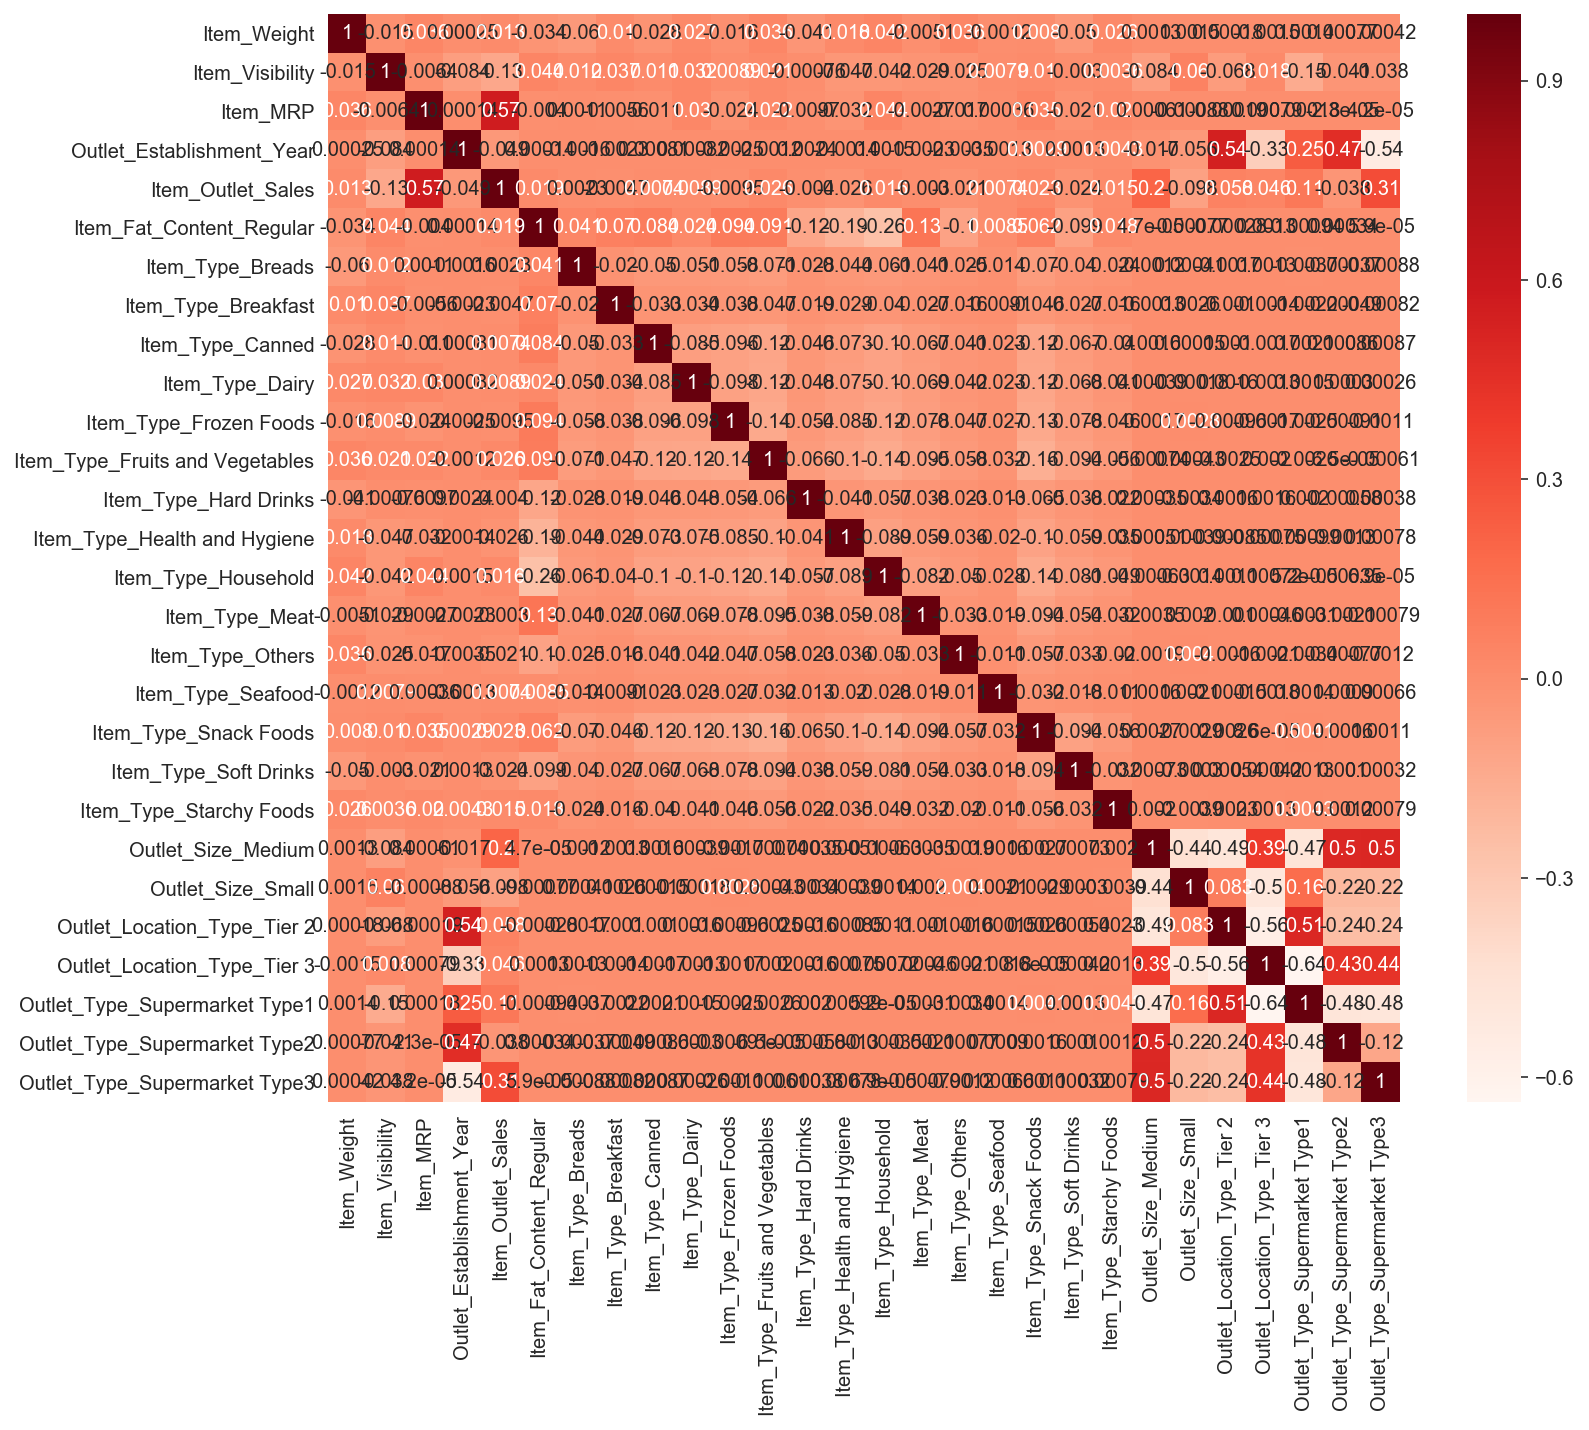

In [62]:
plt.figure(figsize=(12,10))
cor = final.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [63]:
#Correlation with output variable
cor_target = abs(cor["Item_Outlet_Sales"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Item_MRP             0.567574
Item_Outlet_Sales    1.000000
Name: Item_Outlet_Sales, dtype: float64

In [64]:
# Since there are only 2 columns selected in feature selection. We are not considering this method

### WRAPPER METHOD

### BACKWARD ELIMINATION

In [65]:
import statsmodels.api as sm
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1.astype(float)).fit()
model.pvalues

const                               3.872394e-01
Item_Weight                         9.446296e-01
Item_Visibility                     2.352458e-01
Item_MRP                            0.000000e+00
Outlet_Establishment_Year           5.569239e-01
Item_Fat_Content_Regular            1.474252e-01
Item_Type_Breads                    9.840452e-01
Item_Type_Breakfast                 9.380045e-01
Item_Type_Canned                    6.961972e-01
Item_Type_Dairy                     5.132402e-01
Item_Type_Frozen Foods              6.497710e-01
Item_Type_Fruits and Vegetables     6.108024e-01
Item_Type_Hard Drinks               9.726107e-01
Item_Type_Health and Hygiene        8.776041e-01
Item_Type_Household                 4.958792e-01
Item_Type_Meat                      9.987765e-01
Item_Type_Others                    8.086290e-01
Item_Type_Seafood                   2.242347e-01
Item_Type_Snack Foods               8.249343e-01
Item_Type_Soft Drinks               6.981954e-01
Item_Type_Starchy Fo

In [66]:
# backward elimination
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Item_MRP', 'Item_Fat_Content_Regular', 'Outlet_Size_Medium', 'Outlet_Size_Small', 'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']


In [67]:
be_x = train[['Item_MRP', 'Item_Fat_Content_Regular', 'Outlet_Size_Medium', 'Outlet_Size_Small', 'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']]
be_y = train["Item_Outlet_Sales"]
print(be_x.shape)

statsmodel(be_x,be_y)


(8523, 9)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     1218.
Date:                Mon, 30 Sep 2019   Prob (F-statistic):               0.00
Time:                        21:57:45   Log-Likelihood:                -71997.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8513   BIC:                         1.441e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -1994.0752     67.047    -29.741      0.000   -2125.504   -1862.647
Item_MRP                         15.5546      0.196     79.199      0.000      15.170      15.940
Item_Fat_Content_Regular         50.8904     25.593      1.988      0.047       0.722     101.059
Outlet_Size_Medium              215.8398     67.424      3.201      0.001      83.673     348.007
Outlet_Size_Small               126.9278     45.362      2.798      0.005      38.008     215.848
Outlet_Location_Type_Tier 2     136.0081     49.886      2.726      0.006      38.219     233.797
Outlet_Location_Type_Tier 3     140.5653     61.555      2.284      0.022      19.902     261.228
Outlet_Type_Supermarket Type1  1926.0416     43.145     44.641      0.000    1841.467    2010.617
Outlet_Type_Supermarket Type2  1411.3205     91.392     15.443      0.000    1232.171    1590.470
Outlet_Type_Supermarket Type3  3139.1893     91.336     34.370      0.000    2960.148    3318.230
==============================================================================
Omnibus:                      968.071   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2320.617
Skew:                           0.670   Prob(JB):                         0.00
Kurtosis:                       5.177   Cond. No.                     1.98e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
#rfe

In [69]:
from sklearn.feature_selection import RFE

model = LinearRegression()

In [70]:

#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 12
Score with 12 features: 0.240260


In [71]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['Item_Visibility', 'Item_Type_Others', 'Item_Type_Seafood',
       'Item_Type_Soft Drinks', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype='object')


In [72]:
rfex = train[['Item_Visibility', 'Item_Type_Others', 'Item_Type_Seafood',
       'Item_Type_Soft Drinks', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']]
rfey = train["Item_Outlet_Sales"]
statsmodel(rfex,rfey)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     270.1
Date:                Mon, 30 Sep 2019   Prob (F-statistic):               0.00
Time:                        21:57:47   Log-Likelihood:                -74349.
No. Observations:                8523   AIC:                         1.487e+05
Df Residuals:                    8512   BIC:                         1.488e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           318.1500     73.024      4.357      0.000     175.005     461.295
Item_Visibility                -288.4972    326.192     -0.884      0.376    -927.912     350.918
Item_Type_Others               -173.8633    115.724     -1.502      0.133    -400.710      52.984
Item_Type_Seafood               192.5219    186.755      1.031      0.303    -173.562     558.606
Item_Type_Soft Drinks          -187.5133     72.507     -2.586      0.010    -329.645     -45.382
Outlet_Size_Medium               80.3789     59.778      1.345      0.179     -36.800     197.558
Outlet_Size_Small                85.9361     47.568      1.807      0.071      -7.308     179.181
Outlet_Location_Type_Tier 3      42.8141     55.578      0.770      0.441     -66.132     151.760
Outlet_Type_Supermarket Type1  1978.3719     55.949     35.360      0.000    1868.697    2088.046
Outlet_Type_Supermarket Type2  1583.3480     93.719     16.895      0.000    1399.637    1767.059
Outlet_Type_Supermarket Type3  3279.9784     93.745     34.988      0.000    3096.215    3463.741
==============================================================================
Omnibus:                     1495.870   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2856.575
Skew:                           1.083   Prob(JB):                         0.00
Kurtosis:                       4.832   Cond. No.                         27.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
# forward selection

In [74]:
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import warnings
warnings.filterwarnings('ignore')

In [75]:
# Build RF classifier to use in feature selection
clf = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)


# Build step forward feature selection
sfs1 = sfs(clf,k_features = 27,forward=True,
           floating=False, scoring='r2',
           verbose=2,
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.4s finished

[2019-09-30 21:57:48] Features: 1/27 -- score: 0.3245987928356794[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.3s finished

[2019-09-30 21:57:49] Features: 2/27 -- score: 0.41952141947559773[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.3s finished

[2019-09-30 21:57:49] Features: 3/27 -- score: 0.506061226616881[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [76]:
# Build RF classifier to use in feature selection
clf = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)


# Build step forward feature selection
sfs1 = sfs(clf,k_features = 8,forward=True,
           floating=False, scoring='r2',
           verbose=2,
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.2s finished

[2019-09-30 21:57:57] Features: 1/8 -- score: 0.3245987928356794[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.2s finished

[2019-09-30 21:57:57] Features: 2/8 -- score: 0.41952141947559773[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.3s finished

[2019-09-30 21:57:58] Features: 3/8 -- score: 0.506061226616881[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [77]:
# Which features?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[2, 3, 4, 7, 8, 24, 25, 26]


In [78]:
fs_x = train.iloc[:,[2,3,4,7,8,24,25,26]]
fs_y= train.Item_Outlet_Sales
statsmodel(fs_x,fs_y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.734e+32
Date:                Mon, 30 Sep 2019   Prob (F-statistic):               0.00
Time:                        21:58:00   Log-Likelihood:             2.1112e+05
No. Observations:                8523   AIC:                        -4.222e+05
Df Residuals:                    8514   BIC:                        -4.222e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -2.319e-11   1.81e-11     -1.278      0.201   -5.88e-11    1.24e-11
Item_MRP                      -8.271e-15   9.01e-16     -9.175      0.000      -1e-14    -6.5e-15
Outlet_Establishment_Year      1.132e-14    9.1e-15      1.245      0.213   -6.51e-15    2.92e-14
Item_Outlet_Sales                 1.0000   3.35e-17   2.98e+16      0.000       1.000       1.000
Item_Type_Breakfast           -1.137e-13   4.06e-13     -0.280      0.780    -9.1e-13    6.83e-13
Item_Type_Canned              -8.171e-14   1.73e-13     -0.473      0.636   -4.21e-13    2.57e-13
Outlet_Location_Type_Tier 3     6.04e-14   1.46e-13      0.414      0.679   -2.25e-13    3.46e-13
Outlet_Type_Supermarket Type1  2.416e-13   1.45e-13      1.666      0.096   -4.26e-14    5.26e-13
Outlet_Type_Supermarket Type2  1.421e-13   2.67e-13      0.532      0.595   -3.81e-13    6.66e-13
==============================================================================
Omnibus:                     1449.130   Durbin-Watson:                   1.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2654.419
Skew:                          -1.072   Prob(JB):                         0.00
Kurtosis:                       4.696   Cond. No.                     1.29e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
lr = LinearRegression()
ML_model(lr,fs_x,fs_y)

Train score - 1.0
test score -  1.0


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [81]:
lr = LinearRegression()
lr.fit(be_x,be_y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
# higher the alpha value, more restriction on the coefficients; 
# low alpha > more generalization, coefficients are barely
rr = Ridge(alpha=0.01) 
# restricted and in this case linear and ridge regression resembles
rr.fit(be_x,be_y)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [83]:
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(be_x, be_y) 

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [84]:
train_score=lr.score(be_x, be_y)
# test_score=lr.score(X_test, y_test)

In [85]:
Ridge_train_score = rr.score(be_x,be_y)


In [86]:
Ridge_train_score100 = rr100.score(be_x,be_y)
# Ridge_test_score100 = rr100.score(X_test, y_test)



In [87]:
print("linear regression train score:", train_score)
# print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
# print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
# print("ridge regression test score high alpha:", Ridge_test_score100)

linear regression train score: 0.5628427840834195
ridge regression train score low alpha: 0.5628427835163623
ridge regression train score high alpha: 0.5517177490535574


In [88]:
lasso = Lasso()
lasso.fit(be_x,be_y)
train_score=lasso.score(be_x,be_y)
# test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [89]:
print("training score:", train_score) 
# print("test score: ", test_score)
print("number of features used: ", coeff_used)

training score: 0.5627917566834055
number of features used:  9


In [90]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [91]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [92]:
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)

In [93]:
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

In [94]:
print("training score for alpha=0.001:", train_score001) 
print("test score for alpha =0.001: ", test_score001)
print("number of features used: for alpha =0.001:", coeff_used001)

print("training score for alpha=0.00001:", train_score00001) 
print("test score for alpha =0.00001: ", test_score00001)
print("number of features used: for alpha =0.00001:", coeff_used00001)

training score for alpha=0.001: 0.5630243990841602
test score for alpha =0.001:  0.561770728537548
number of features used: for alpha =0.001: 27
training score for alpha=0.00001: 0.5630244570771994
test score for alpha =0.00001:  0.5617658799543886
number of features used: for alpha =0.00001: 27


##### Decision Tree

In [95]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeRegressor( random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, cv=n_folds)

tree.fit(be_x,be_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=100,
                                             splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 40)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [96]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 16, 5),
    'min_samples_leaf': range(50, 151, 50),
    'min_samples_split': range(50, 151, 50),
    'criterion': ["mse", "mae"]
}


# Instantiate the grid search model
dtree = DecisionTreeRegressor()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = 5, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  3.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': range(5, 16, 5),
                         'min_samples_leaf': range(50, 151, 50),
                         'min_samples_

In [97]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.5921363104378553
DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=50,
                      min_samples_split=50, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')


In [98]:
ML_model(tree,be_x,be_y)
tree.score(be_x,be_y)

Train score - 0.612570489134744
test score -  0.5867990021947719


0.604544046939104

###### Decision tree gives an accuracy of 60%

### Random forest regressor

In [99]:
from sklearn.ensemble import RandomForestRegressor

params = {'n_estimators' : [2,5,8,10,15,18,20],
    'criterion':['mse','mae'],
    'max_depth':[3,5,7,9,11,13,15],
    'min_samples_split':[2,3,4],
    'min_samples_leaf' : [1,3,5]}

rf = RandomForestRegressor(n_estimators=10)
rf.fit(be_x,be_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [100]:
ML_model(rf,be_x,be_y)

Train score - 0.9034074160174815
test score -  0.48120680835418683


##### Random forest regressor with grid search 

In [101]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["mse", "mae"]
}


# Instantiate the grid search model
rf_gs = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf_gs, param_grid = param_grid, 
                          cv = 5, verbose = 1)

# Fit the grid search to the data
grid_search.fit(be_x,be_y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  4.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'],
  

In [102]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=50, min_samples_split=50,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [103]:
param_grid = {'n_estimators':10,
             'max_depth':10,
             'criterion':'mse',
             'min_samples_leaf':50}

rf_gs = RandomForestRegressor(n_estimators = 10,max_depth= 10,min_weight_fraction_leaf=0.0,
                              max_features='auto',min_impurity_decrease=0.0,verbose=0
                              ,criterion ='mse', min_samples_leaf= 50,min_samples_split=100)
ML_model(rf_gs,be_x,be_y)

Train score - 0.6174752722858075
test score -  0.5939728460482236


##### Random forest regressor with random search 

In [104]:
from sklearn.ensemble import RandomForestRegressor

params = {'n_estimators' : [2,5,8,10,15,18,20],
    'criterion':['mse','mae'],
    'max_depth':[3,5,7,9,11,13,15],
    'min_samples_split':[2,3,4],
    'min_samples_leaf' : [1,3,5],}

In [105]:
rf_rs = RandomForestRegressor()
random_search = RandomizedSearchCV(estimator = rf_rs, param_distributions= params, 
                          cv = 5, verbose = 1)

random_search.fit(be_x,be_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.2min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_state=N

In [106]:
random_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [132]:
rf_rs = RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)
rf_rs.fit(be_x,be_y)


RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [133]:
ML_model(rf_rs,be_x,be_y)

Train score - 0.6087002295401529
test score -  0.5938263932744581


### Bagging

In [109]:
%matplotlib inline
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import AdaBoostRegressor
from mlxtend.classifier import StackingClassifier
from sklearn.neighbors import KNeighborsRegressor

from warnings import filterwarnings
filterwarnings('ignore')
np.random.seed(0)

In [110]:
X_train_be,X_test_be,y_train_be,y_test_be = train_test_split(be_x,be_y,test_size = 0.3,random_state = 0)



clf1 = DecisionTreeRegressor(criterion='mse')
clf2 = KNeighborsRegressor(n_neighbors=3)    
clf3 = Ridge(alpha=3)
clf4 = Lasso(alpha=0.001)    
clf5 = LinearRegression()


bagging1 = BaggingRegressor(base_estimator=clf1, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging2 = BaggingRegressor(base_estimator=clf2, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging3 = BaggingRegressor(base_estimator=clf3, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging4 = BaggingRegressor(base_estimator=clf4, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging5 = BaggingRegressor(base_estimator=clf5, n_estimators=10, max_samples=0.8, max_features=0.8)


label = ['Decision Tree','bagging tree','knn','bagging knn','Ridge','bagging ridge',
         'Lasso','bagging lasso','Linear','bagging linear']
clf_list = [clf1,bagging1,clf2,bagging2,clf3,bagging3,clf4,bagging4,clf5,bagging5]
grid = itertools.product([0,1],repeat=5)

for clf, label, grd in zip(clf_list, label, grid):        
    scores =cross_val_score(clf,X_train_be,y_train_be, cv=10)
    print ("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
        
    clf.fit(X_train, y_train)
    


Accuracy: 0.16 (+/- 0.08) [Decision Tree]
Accuracy: 0.47 (+/- 0.03) [bagging tree]
Accuracy: 0.39 (+/- 0.05) [knn]
Accuracy: 0.46 (+/- 0.04) [bagging knn]
Accuracy: 0.56 (+/- 0.03) [Ridge]
Accuracy: 0.51 (+/- 0.02) [bagging ridge]
Accuracy: 0.56 (+/- 0.03) [Lasso]
Accuracy: 0.52 (+/- 0.03) [bagging lasso]
Accuracy: 0.56 (+/- 0.03) [Linear]
Accuracy: 0.52 (+/- 0.04) [bagging linear]


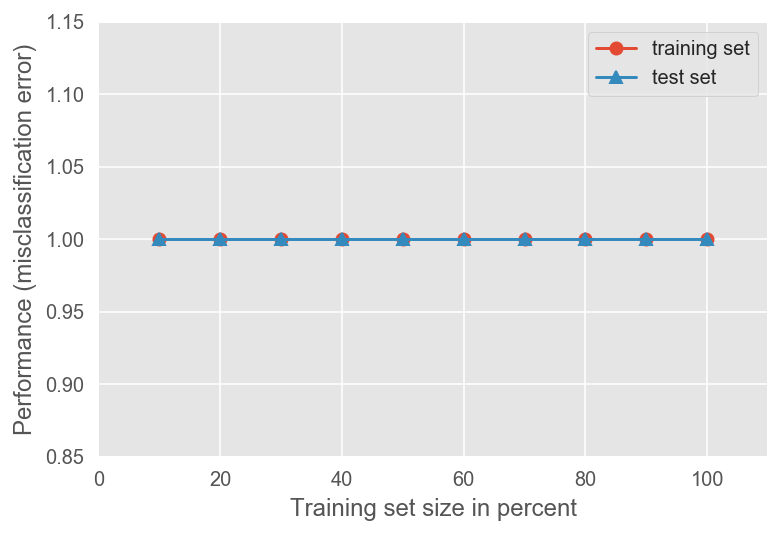

In [111]:
#plot learning curves
# X = fin.drop('Order Priority',1)
# y = fin['Order Priority']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, bagging4, print_model=False, style='ggplot')
plt.show()


##### Boosting

In [112]:
clf1 = DecisionTreeRegressor(max_depth=1)
clf2 = LinearRegression()
clf3 = Ridge()
clf4 = Lasso()
boster1 = AdaBoostRegressor(base_estimator=clf1, n_estimators=10)
boster2 = AdaBoostRegressor(base_estimator=clf2, n_estimators=10)
boster3 = AdaBoostRegressor(base_estimator=clf3, n_estimators=10)
boster4 = AdaBoostRegressor(base_estimator=clf4, n_estimators=10)
label = ['Decision Tree','Bos_Tree','Linear','bos_lr','Ridge','bos_ridge','Lasso','bos_lasso']
clf_list = [clf1,boster1,clf2,boster2,clf3,boster3,clf4,boster4]
grid = itertools.product([0,1],repeat=4)

for clf, label, grd in zip(clf_list, label, grid):        
    scores =cross_val_score(clf,X_train,y_train, cv=10)
    print ("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
        
    clf.fit(X_train, y_train)
    

Accuracy: 0.23 (+/- 0.03) [Decision Tree]
Accuracy: 0.20 (+/- 0.05) [Bos_Tree]
Accuracy: 0.56 (+/- 0.03) [Linear]
Accuracy: 0.51 (+/- 0.05) [bos_lr]
Accuracy: 0.56 (+/- 0.03) [Ridge]
Accuracy: 0.52 (+/- 0.04) [bos_ridge]
Accuracy: 0.56 (+/- 0.03) [Lasso]
Accuracy: 0.52 (+/- 0.06) [bos_lasso]


#### XGboost

In [113]:
import xgboost
from sklearn.metrics import explained_variance_score

In [114]:
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
X_train_be,X_test_be,y_train_be,y_test_be = train_test_split(be_x,be_y,test_size = 0.3,random_state = 0)

xgb.fit(X_train,y_train)
predictions = xgb.predict(X_test)
print(explained_variance_score(predictions,y_test))

[22:09:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.27337839136075714


In [115]:
accuracy = explained_variance_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 56.97%


#### Gradient booster

In [116]:
from sklearn.ensemble import GradientBoostingRegressor
boost_reg = GradientBoostingRegressor(n_estimators=50,
                                      random_state=3)

In [134]:
print(boost_reg.fit(X_train, y_train))
print(boost_reg.score(X_test, y_test))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='auto', random_state=3,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)
0.5917723212225603


In [118]:
print(boost_reg.score(X_train, y_train))

0.6225609394137643


#### Ada booster

###### Decision forest adaboost

In [119]:
from sklearn.ensemble import AdaBoostRegressor

ada_clf=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=1.0, loss='linear',
        n_estimators=100, random_state=0)
ada_clf.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=1.0, loss='linear', n_estimators=100,
                  rand

In [120]:
ada_clf.score(X_train, y_train)

0.9975655055774215

In [121]:
ada_clf.score(X_test, y_test)

0.5059150662380252

###### Random forest ada boost

In [122]:
ada_clf=AdaBoostRegressor(base_estimator=RandomForestRegressor(), learning_rate=1.0, loss='linear',
        n_estimators=100, random_state=0)
ada_clf.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators='warn',
                                                       n_jobs=None,
                                                       oob_score=False,
                    

In [123]:
print(ada_clf.score(X_train, y_train))
print(ada_clf.score(X_test, y_test))


0.9762519726709857
0.5581266198301369


In [124]:
param_grid = {'n_estimators':10,
             'max_depth':10,
             'criterion':'mse',
             'min_samples_leaf':50}

rf_gs = RandomForestRegressor(n_estimators = 10,max_depth= 10,min_weight_fraction_leaf=0.0,
                              max_features='auto',min_impurity_decrease=0.0,verbose=0
                              ,criterion ='mse', min_samples_leaf= 50,min_samples_split=100)
ML_model(rf_gs,be_x,be_y)

Train score - 0.6175489346145858
test score -  0.5956661857112852


In [125]:
test_df.drop('Item_Outlet_Sales',1,inplace = True)

In [137]:
ind = train.drop('Item_Outlet_Sales',1)
dep = train.Item_Outlet_Sales
X_train_fin,X_test_fin,y_train_fin,y_test_fin = train_test_split(ind,dep,test_size = 0.3,random_state = 1)

rf_gs.fit(X_train_fin,y_train_fin)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=50, min_samples_split=100,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [138]:
print(rf_gs.score(X_train_fin,y_train_fin))
print(rf_gs.score(X_test_fin,y_test_fin))

0.6213561427846676
0.6050648551109501


In [140]:
target = rf_gs.predict(test_df)

In [143]:
identity = pd.read_csv('Test.csv')

In [144]:
identity.shape

(5681, 11)

In [145]:
target.shape

(5681,)

In [146]:
identity.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


array([1627.53497873, 1345.51519434,  588.73207215, ..., 1902.86376946,
       3810.42418494, 1303.19105829])

In [148]:
submitting_df = identity[['Item_Identifier','Outlet_Identifier']]

In [149]:
submitting_df['Item_Outlet_Sales'] = target

In [150]:
submitting_df

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1627.534979
1,FDW14,OUT017,1345.515194
2,NCN55,OUT010,588.732072
3,FDQ58,OUT017,2505.171936
4,FDY38,OUT027,6046.015934
5,FDH56,OUT046,1858.183989
6,FDL48,OUT018,672.964930
7,FDC48,OUT027,2326.766598
8,FDN33,OUT045,1598.282823
9,FDA36,OUT017,3231.719561


### Submission

In [152]:
pd.DataFrame(submitting_df).to_csv("F:/mysubmissionbigmart.csv",index=False)